In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Load training and testing data
train_path = '/Users/shawlin/Desktop/Statistical Deep Learning/MId/fashion-mnist_train.csv'
test_path = '/Users/shawlin/Desktop/Statistical Deep Learning/MId/fashion-mnist_test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Separate features and labels
x_train = train_data.iloc[:, 1:].values  # Features (pixel values)
y_train = train_data.iloc[:, 0].values   # Labels (classes)
x_test = test_data.iloc[:, 1:].values    # Features (pixel values)
y_test = test_data.iloc[:, 0].values     # Labels (classes)

In [5]:
# Reshape data to (num_samples, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [7]:
def create_model():
    model = Sequential()
    
    # First convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Second convolutional layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    
    return model

# Create the model
model = create_model()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Set hyperparameters
batch_size = 128
epochs = 50

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6315 - loss: 1.0091 - val_accuracy: 0.8471 - val_loss: 0.4321
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8253 - loss: 0.4848 - val_accuracy: 0.8738 - val_loss: 0.3484
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8509 - loss: 0.4159 - val_accuracy: 0.8860 - val_loss: 0.3108
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8643 - loss: 0.3736 - val_accuracy: 0.8971 - val_loss: 0.2817
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8698 - loss: 0.3577 - val_accuracy: 0.8958 - val_loss: 0.2734
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8789 - loss: 0.3346 - val_accuracy: 0.9022 - val_loss: 0.2608
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8827 - loss: 0.3255 - val_accuracy: 0.9081 - val_loss: 0.2480
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8860 - loss: 0.3099 - val_accu

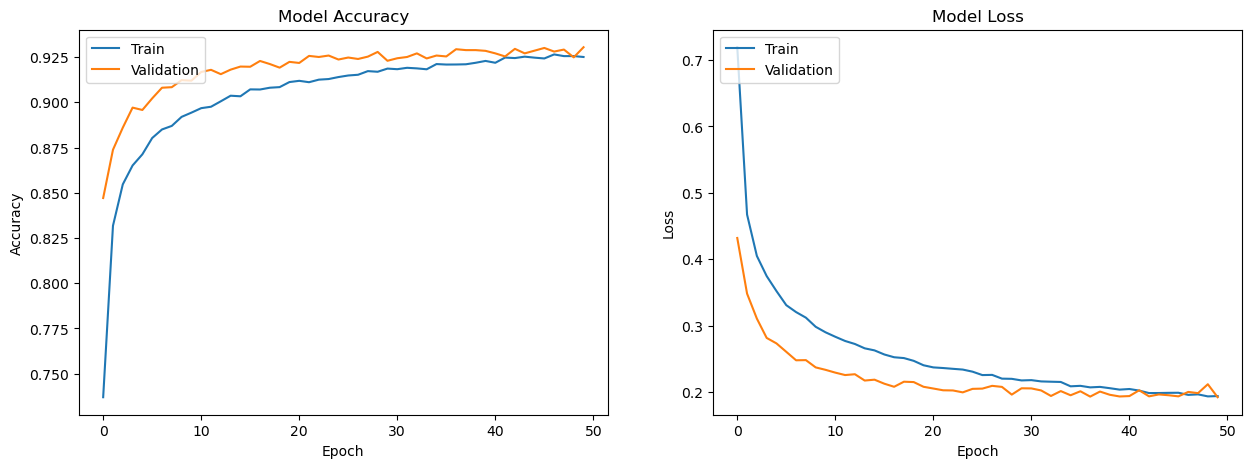

In [10]:
def plot_model_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot accuracy curves
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validation'], loc='upper left')
    
    # Plot loss curves
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

# Call the function to plot the curves
plot_model_history(history)